## **Data Cleaning & Preprocessing Challenge**

RANA ELMAGHRABY 💙

- Objective: Build a robust data preprocessing pipeline for a hotel booking cancellation prediction model.
- Business Problem: The revenue team has identified that last-minute booking cancellations significantly
- impact profitability. Your task is not to build the final model, but to prepare the raw data for it. The quality
of your data cleaning will directly determine the model's future success.

**Phase 1: Exploratory Data Analysis (EDA) & Data Quality Report**

- Load the data and generate summary statistics (.describe(), .info()).
- Identify all missing values. Create a visualization (e.g., a missingno matrix or a heatmap) to
- show the extent and pattern of missing data for each column.
- Detect outliers in key numerical columns (like adr and lead_time) using boxplots and the IQR
method.
- Document your findings in your notebook. What are the main data quality issues?

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [181]:
df = pd.read_csv("D:\\GTC\\hotel_bookings.csv")

In [182]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [183]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [184]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [185]:
missing=df.isna().sum()
missing[missing > 0]

children         4
country        488
agent        16340
company     112593
dtype: int64

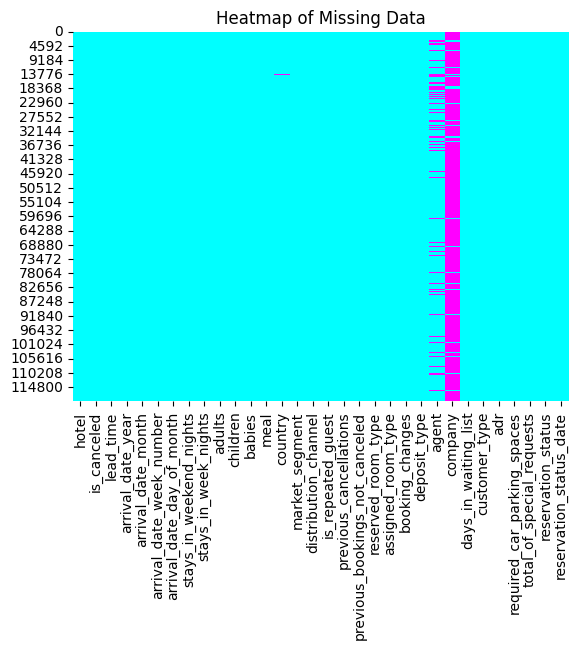

In [186]:
sns.heatmap(df.isnull(), cbar=False, cmap='cool')
plt.title("Heatmap of Missing Data")
plt.show()

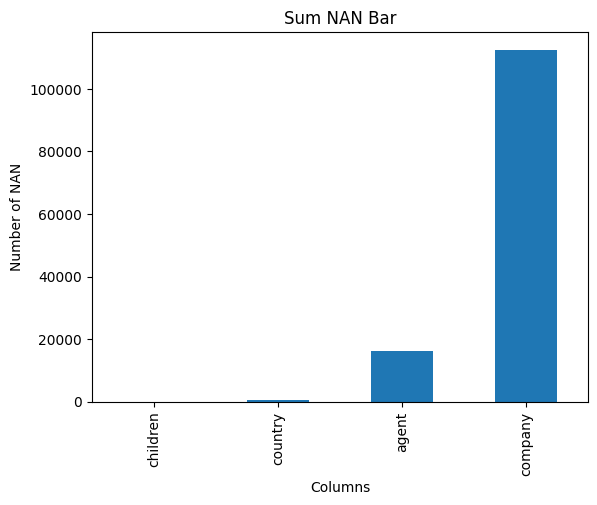

In [187]:
missing[missing>0].plot(kind="bar" , title="Sum NAN Bar" , xlabel="Columns" , ylabel="Number of NAN")
plt.show()

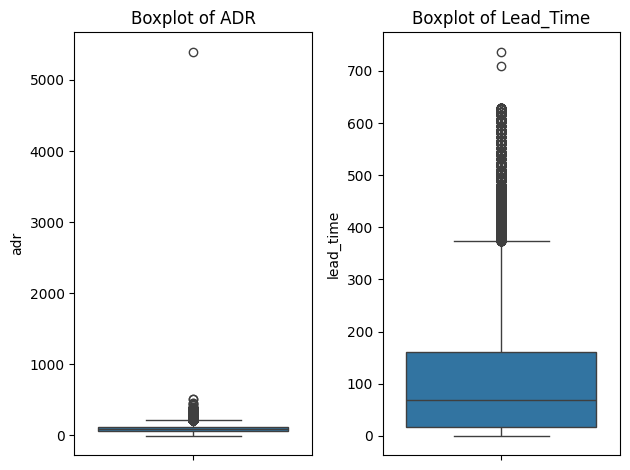

In [188]:
plt.subplot(1, 2, 1)
plt.title('Boxplot of ADR')
sns.boxplot(df['adr'])

plt.subplot(1, 2, 2)
plt.title('Boxplot of Lead_Time')
sns.boxplot(df['lead_time'])

plt.tight_layout()
plt.show()

- Key Findings
- Missing Values: The most significant issue is the large number of missing values. The columns company and agent have a very high percentage of missing data, which was confirmed by the bar chart and heatmap. The country column also has some missing values, but on a much smaller scale.

- Outliers: There are extreme outliers in the adr and lead_time columns. The boxplots for both columns show numerous data points that are far beyond the main distribution, and the describe() statistics confirm this with very high maximum values that are disproportionate to the 75th percentile. These outliers will likely need to be handled to ensure your model's accuracy.

-------------------------

- Phase 2: Data Cleaning (The Core of the Project)
- Handle Missing Values: Develop and justify a strategy for each column.
- For company and agent: Replace missing values with a label like "None" or 0. For
- country: Impute with the mode (most frequent country) or a new "Unknown"
category.
- For children: A small number of missing values could be imputed with the median or
mode.
- Remove Duplicates: Identify and drop any exact duplicate rows.
- Handle Outliers: Cap extreme values in columns like adr (e.g., any value above 1000 can be
set to 1000) to prevent them from skewing future models. Justify your chosen method. Fix
- Data Types: Ensure date columns are correctly formatted.

In [189]:
df["company"] = df["company"].fillna("None")

In [190]:
df["agent"] = df["agent"].fillna("0")

In [191]:
df["country"] = df["country"].fillna(df["country"].mode)

In [192]:
df["children"] = df["children"].fillna(df["children"].mode()[0])

In [193]:
df.isna().sum().sum()

np.int64(0)

In [194]:
df.duplicated().sum()

np.int64(31994)

In [195]:
df = df.drop_duplicates()

In [196]:
df.duplicated().sum()

np.int64(0)

In [197]:
df.loc[df["adr"] > 1000, "adr"] = 1000

In [198]:
df["children"] = df["children"].astype('float64')

- Phase 3: Feature Engineering & Preprocessing
- Create New Features:
total_guests = adults + children + babies
total_nights = stays_in_weekend_nights + stays_in_week_nights
is_family = A binary flag (Yes/No) indicating if the booking includes children or babies.
- Encode Categorical Variables:
Use One-Hot Encoding for low-cardinality categories (e.g., meal, market_segment).
For high-cardinality features like country, use techniques like frequency encoding or
grouping infrequent categories into an "Other" group.
CRITICAL STEP: Remove Data Leakage: Immediately drop the columns reservation_status and
reservation_status_date. These columns contain information that would not be available at
the time of prediction and would make the model useless in a real-world scenario. Final
Preparation: Split your cleaned dataset into training and testing sets (test_size=0.2,
random_state=42).

In [199]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [200]:
df['total_guests'] = df['adults'] + df["children"] + df['babies']

In [201]:
df['is_family'] = np.where((df['children'] > 0) | (df['babies'] > 0), 1, 0)

In [202]:
df = pd.get_dummies(df, columns=['meal', 'market_segment'], drop_first=True)

In [203]:
frequency_map = df['country'].value_counts(normalize=True).to_dict()
df['country_encoded'] = df['country'].map(frequency_map)

In [204]:
df.drop(['reservation_status', 'reservation_status_date', 'country'], axis=1, inplace=True)

In [205]:
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

## **DONE**